                                                    MPI Assignments


### Exercise 1: Hello World


1. Write an MPI program which prints the message "Hello World"


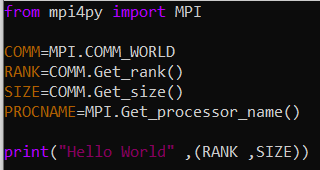
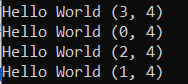

Weimplement the "Hello World" message on each process with its rank and the total number of processes using MPI


2. Modify your program so that each process prints out both its rank and the total number of processes P that the code is running on, i.e. the size of `MPI_COMM_WORLD`.



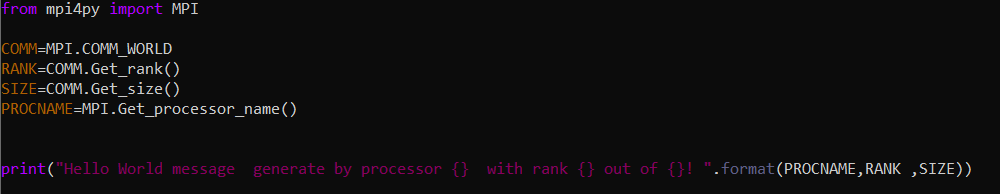
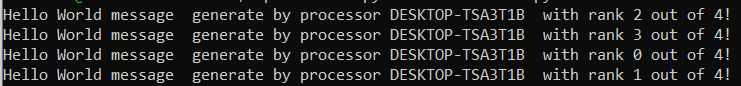

Multiple processors with different ranks are generating Hello World messages

3. Modify your program so that only a single controller process (e.g. rank 0) prints out a message (very useful when you run with hundreds of processes).



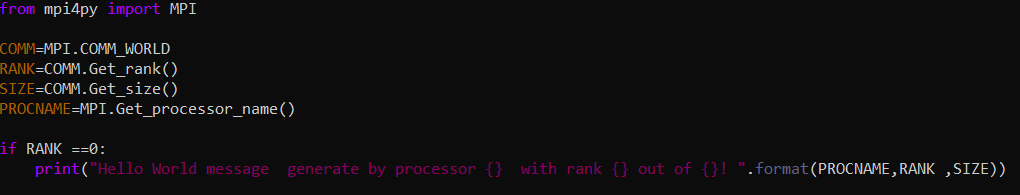


Tis script is usingto print a message on the process with rank 0, displaying information about the processor name, rank, and total size of the communicator

4. What happens if you omit the final MPI procedure call in your program?


It is important to include the <b>MPI.Finalize()</b> call at the end of an MPI program to ensure proper cleanup of the MPI environment and all allocated resources. Omitting this call may lead to potential issues such as memory leaks or hung processes, especially when running the program on larger clusters.


### Exercise 2: Sharing Data
Create a program that obtains an integer input from the terminal and distributes it to all the MPI processes.
Each process must display its rank and the received value. 
Keep reading values until a negative integer is entered.
**Output Example**
```shell
10

Process 0 got 10

Process 1 got 10
```


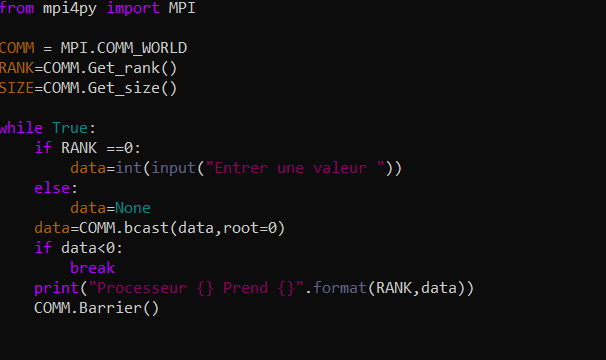

The provided MPI program reads an integer input from the terminal, broadcasts it to all processes, waits for all processes to synchronize using MPI Barrier, and finally displays the rank and the received value of each process.

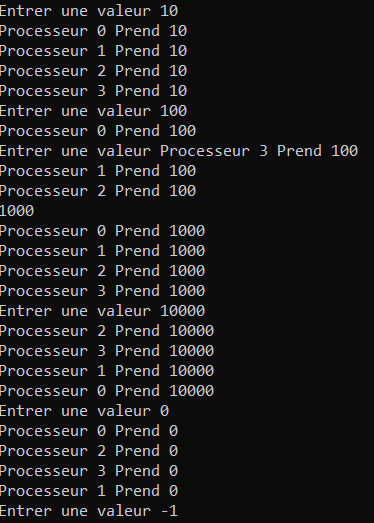


### Exercise 3 Sending in a ring (broadcast by ring)

Write a program that takes data from process zero and sends it to all of the other processes by sending it in a ring. That is, process i should receive the data add the rank of the process to it then send it to process i+1, until the last process is reached.
Assume that the data consists of a single integer. Process zero reads the data from the user.
print the process rank and the value received.

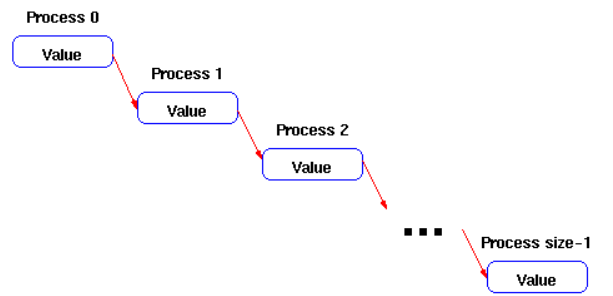

You may want to use these MPI routines in your solution:
`Send` `Recv` 

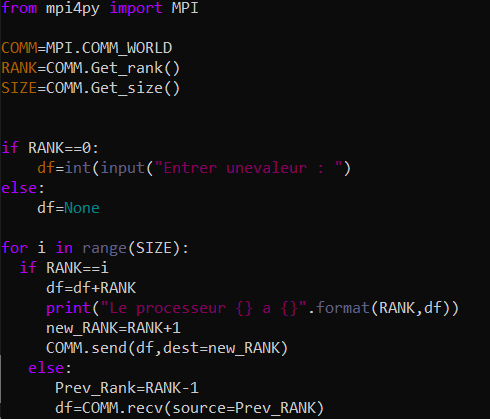
This program sends an integer value in a ring among processes, each process adds its rank to the value and passes it on to the next process until a negative value is entered.

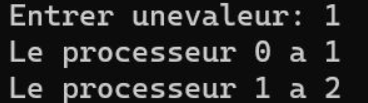

### Exercise 4: Scattering Matrix
1. Create an n by m matrix A on processor 0.
2. Use MPI_Scatterv to send parts of the matrix to the other processors.
3. Processor 1 receives A(i,j) for i=0 to (n/2)-1 and j=m/2 to m-1.
4. Processor 2 receives A(i,j) for i=n/2 to n-1 and j=0 to (m/2)-1.
5. Processor 3 receives A(i,j) for i=n/2 to n-1 and j=m/2 to m-1.
**Example:** using n=m=8 for simplicity.

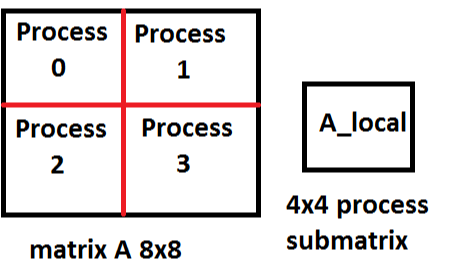


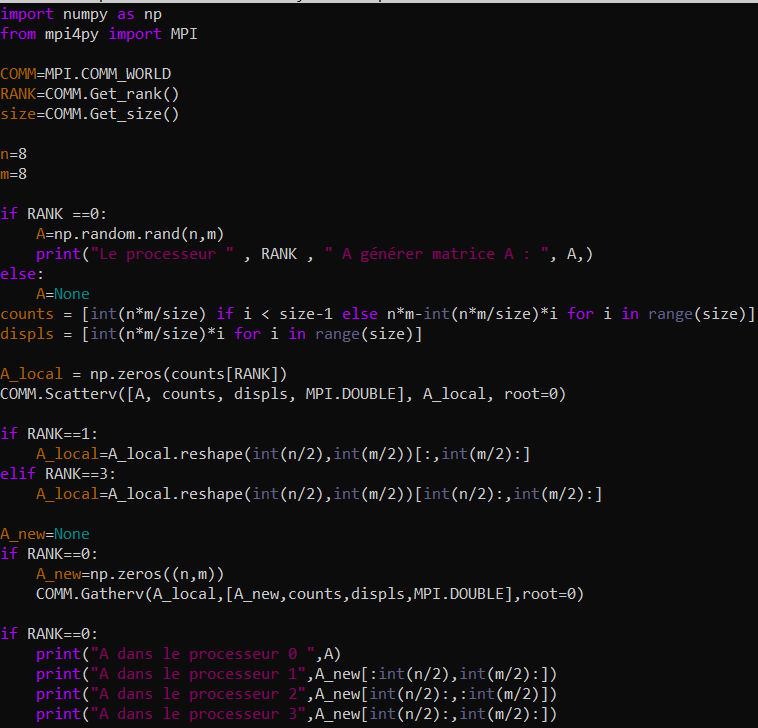
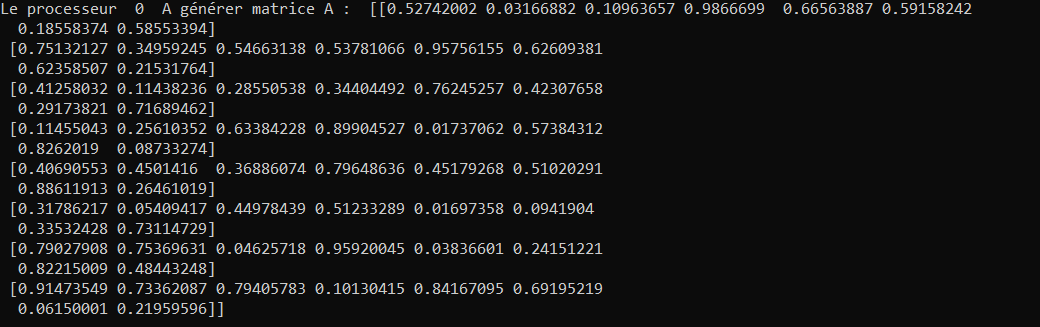

### Exercise 5: Pi calculation
An approximation to the value π can be obtained from the following expression

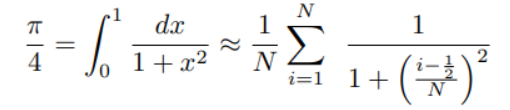

where the answer becomes more accurate with increasing N. Iterations over i are independent so the
calculation can be parallelized.

For the following exercises you should set N = 840. This number is divisible by 2, 3, 4, 5, 6, 7 and 8
which is convenient when you parallelize the calculation!

1. Create a program where each process independently computes the value of `π` and prints it to the screen. Check that the values are correct (each process should print the same value)


2. Now arrange for different processes to do the computation for different ranges of i. For example, on two processes: rank 0 would do i = 0, 1, 2, . . . , N/2 - 1; rank 1 would do i = N/2, N/2 + 1, . . . , N-1.
Print the partial sums to the screen and check the values are correct by adding them up by hand.


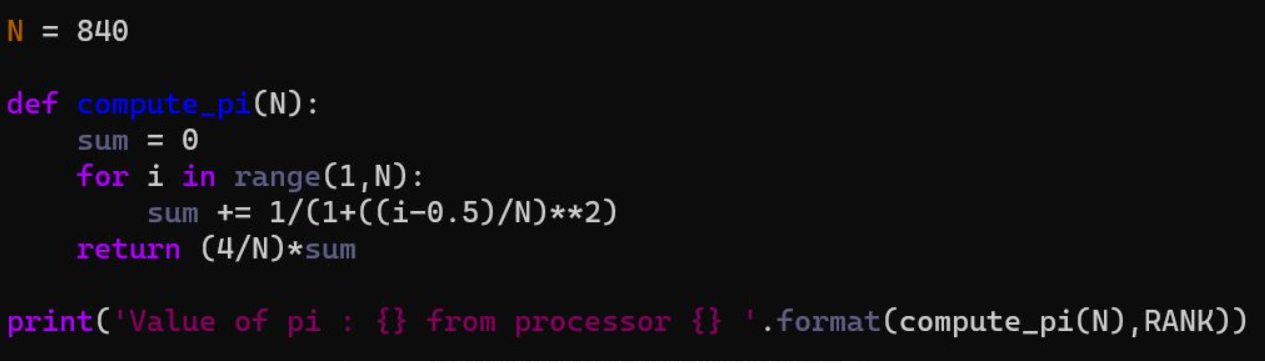
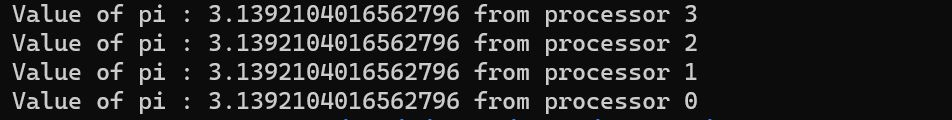
---------------------------------------------------------------------------------------------------------------
1. Now we want to accumulate these partial sums by sending them to the controller (e.g. rank 0) to add up:
- all processes (except the controller) send their partial sum to the controller
- the controller receives the values from all the other processes, adding them to its own partial sum
*N.B You should use the `MPI` routines `MPI_Ssend` and `MPI_Recv`.*
2. Use the function `MPI_Wtime` (see below) to record the time it takes to perform the calculation. For a given value of N, does the time decrease as you increase the number of processes? Note that to ensure that the calculation takes a sensible amount of time (e.g. more than a second) you will probably have to perform the calculation of `π` several thousands of times.

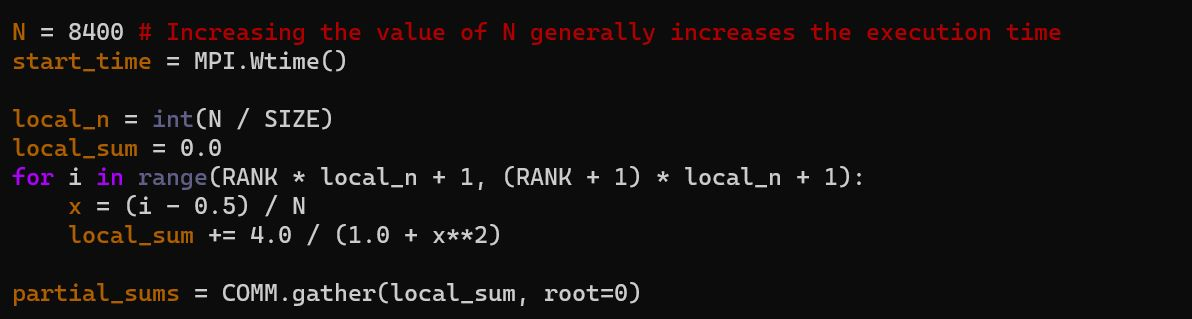
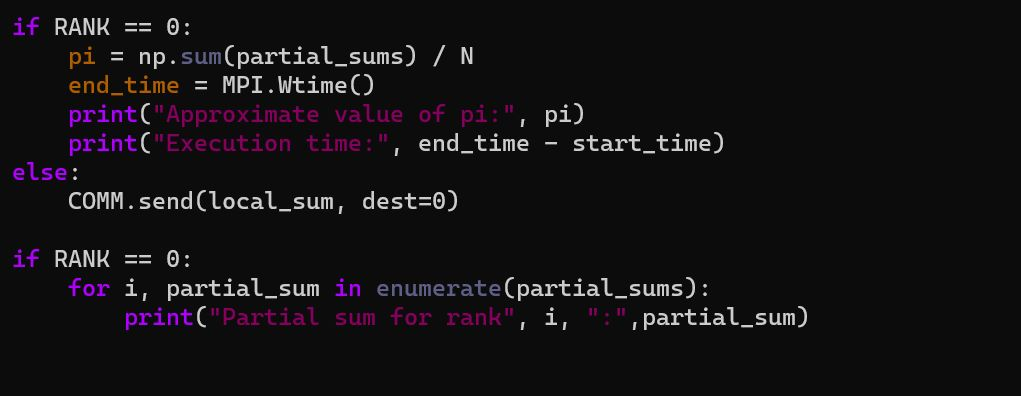
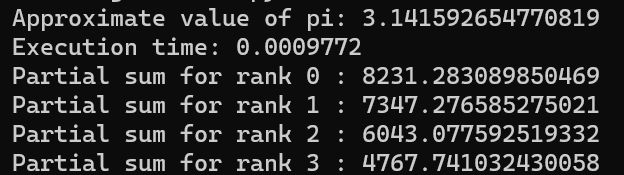